# Teknisk Tirsdag: Unsupervised Learning

Du er nu kommet ind i anden uge af din ansættelse i den norske virksomhed. Din leder var meget tilfreds med analysen fra sidste uge, og mener nu at vi skal kigge lidt breddere på spillere.

Helt konkert er vores kunder interesseret i at undersøge om hvordan forholdet mellem spillernes placeringer på banen, forholder sig til deres fysiske egenskaber. 

In [16]:
#PURE PYTHON!!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster

### Import af renset data

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

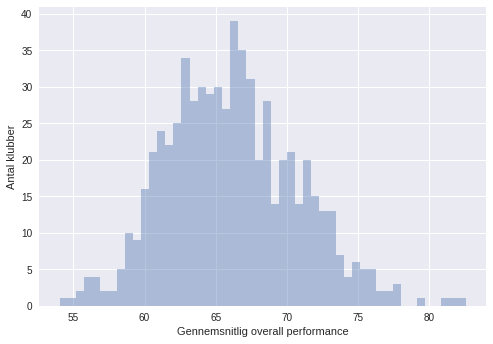

Træningsæt størrelse: 1017 - Testsæt størrelse: 255


In [14]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

Opgaver
====

1. Isolere de kolonner som vi ønsker at basere analysen på.
2. Noget med hyperparameter optimiering Elbow metode... 
3. Noget med at fortolke hvilke spillere der er outliers i deres spiller-gruppe... Kig på outliers, og brug forskellige outlier metrikker.

### Opgave 1: Find vores feature kolonner.

Som data scientist er det uundgåeligt, at skulle få beskidte fingre og arbejde med kode. Derfor skal vi i denne øvelse bruge nogle af Python's funktioner til finde hhv. det indeks hvor de fysiske attributter starter og slutter. *Hvis alt fejler, kan man også tælle sig frem til løsningen :-)*

Vi er så heldige, at et pandas objekt har en attribut som indeholder en liste af kolonner. For at udtrække hhv. start- og slut-indekset ud af denne liste, skal vi først identificere hvilke to elementer som vi ønsker udtrækket.

- Dernæst skal du indeksere elementerne i listen. Til dette findes den gode metode enumerate.
- Vi har nu lavet en liste med *tupler* (En fancy måde i Python at sige lister af lister), hvor hver tuple består sådan ud: (indeks, kolonne_navn). Hvis vi kalder tuplen t, er, måden man tilgår kolonne_navn på: t[1]  
  
  Vi ønsker nu at udtrække det element som indeholder (indeks, kolonne_med_første_fysisk_attribut), det kan man med *filter* metoden. Den tager 2 argumenter: En funktion, der fortæller hvordan vi skal filtrere, og datasættet vi ønsker at filtrere på. Eks. filter(lambda x: x % 2, [1,2,3,4,5,6,7,8,9,10]). Her finder vi de lige numre( % er lig med modulo i Python) i listen som er [2,4,6,8,10]

In [97]:
enumareted_cols = list(enumerate(attribute_df.columns)) # der skal noget rundt om df.columns

In [98]:
attribute_start_col = list(filter(lambda x: x[1]=='Acceleration', enumareted_cols))[0][0] # brug filter her.
attribute_start_col

9

In [99]:
attribute_end_col = list(filter(lambda x: x[1]=='Volleys',enumareted_cols))[0][0] # brug filter her.
attribute_end_col

IndexError: list index out of range

In [94]:
attribute_col = [0,2,5]+list(range(attribute_start_col, attribute_end_col+1, 1))

In [95]:
attribute_df = df.iloc[:,attribute_col]

In [96]:
attribute_df.columns

Index(['Name', 'Nationality', 'Club', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle'],
      dtype='object')

In [53]:
attribute_df

,Name,Nationality,Club,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,Portugal,Real Madrid CF,89.0,63.0,89.0,63.0,93.0,95.0,85.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,L. Messi,Argentina,FC Barcelona,92.0,48.0,90.0,95.0,95.0,96.0,77.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,Neymar,Brazil,Paris Saint-Germain,94.0,56.0,96.0,82.0,95.0,92.0,75.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,L. Suárez,Uruguay,FC Barcelona,88.0,78.0,86.0,60.0,91.0,83.0,77.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,M. Neuer,Germany,FC Bayern Munich,58.0,29.0,52.0,35.0,48.0,70.0,15.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0
5,R. Lewandowski,Poland,FC Bayern Munich,79.0,80.0,78.0,80.0,89.0,87.0,62.0,...,91.0,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0
6,De Gea,Spain,Manchester United,57.0,38.0,60.0,43.0,42.0,64.0,17.0,...,88.0,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0
7,E. Hazard,Belgium,Chelsea,93.0,54.0,93.0,91.0,92.0,87.0,80.0,...,85.0,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0
8,T. Kroos,Germany,Real Madrid CF,60.0,60.0,71.0,69.0,89.0,85.0,85.0,...,86.0,90.0,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0
9,G. Higuaín,Argentina,Juventus,78.0,50.0,75.0,69.0,85.0,86.0,68.0,...,88.0,75.0,88.0,18.0,80.0,72.0,22.0,85.0,70.0,88.0
